## Proyecto Final 2

Presentado por:

Karin Elizabeth Lopez Padilla

Jose Andres Marquez Morataya

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
df.head()


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


2. Análisis exploratorio: debe realizarlo para todo el dataset elegido, mostrando información relevante. Mostrar resultados y gráficas
3. Selección de Variables:
    a. Variable a predecir: tipo categórico
    b. Variables predictoras: variables que considere esenciales.

In [3]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [13]:
df["origin_country"].value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [6]:
summary = df.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
price,1573.0,8.325372,3.932030,1.0,5.81,8.00,11.00,49.0
retail_price,1573.0,23.288620,30.357863,1.0,7.00,10.00,26.00,252.0
units_sold,1573.0,4339.005086,9356.539302,1.0,100.00,1000.00,5000.00,100000.0
uses_ad_boosts,1573.0,0.432931,0.495639,0.0,0.00,0.00,1.00,1.0
rating,1573.0,3.820896,0.515374,1.0,3.55,3.85,4.11,5.0


In [5]:
categoric_Var=[]
discret_var=[]
Continues_vars= []

for colname in df.columns:
    if(df[colname].dtype == 'object'):
        categoric_Var.append(colname)
    else:
        cantidad_valores = len(df[colname].value_counts())
        if(cantidad_valores<=30):
            discret_var.append(colname)
        else:
            Continues_vars.append(colname)

In [6]:
categoric_Var
discret_var
Continues_vars

['price',
 'retail_price',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'product_variation_inventory',
 'countries_shipped_to',
 'merchant_rating_count',
 'merchant_rating']

In [7]:
dfcategoric_var = pd.DataFrame(df, columns = categoric_Var)
dfdiscret_var = pd.DataFrame(df, columns = discret_var)
dfcontinuos_var = pd.DataFrame(df, columns = Continues_vars)

In [8]:
categoric_Var.remove('origin_country')

In [9]:
def plotcategoricavals(df, categoric_Var ,y):
    for column in categoric_Var:
        plt.figure(figsize=(12,6))
        plot = sns.countplot(x=df[column], hue=df['origin_country'])
        plt.show()

### Analisis de variables categoricas

c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


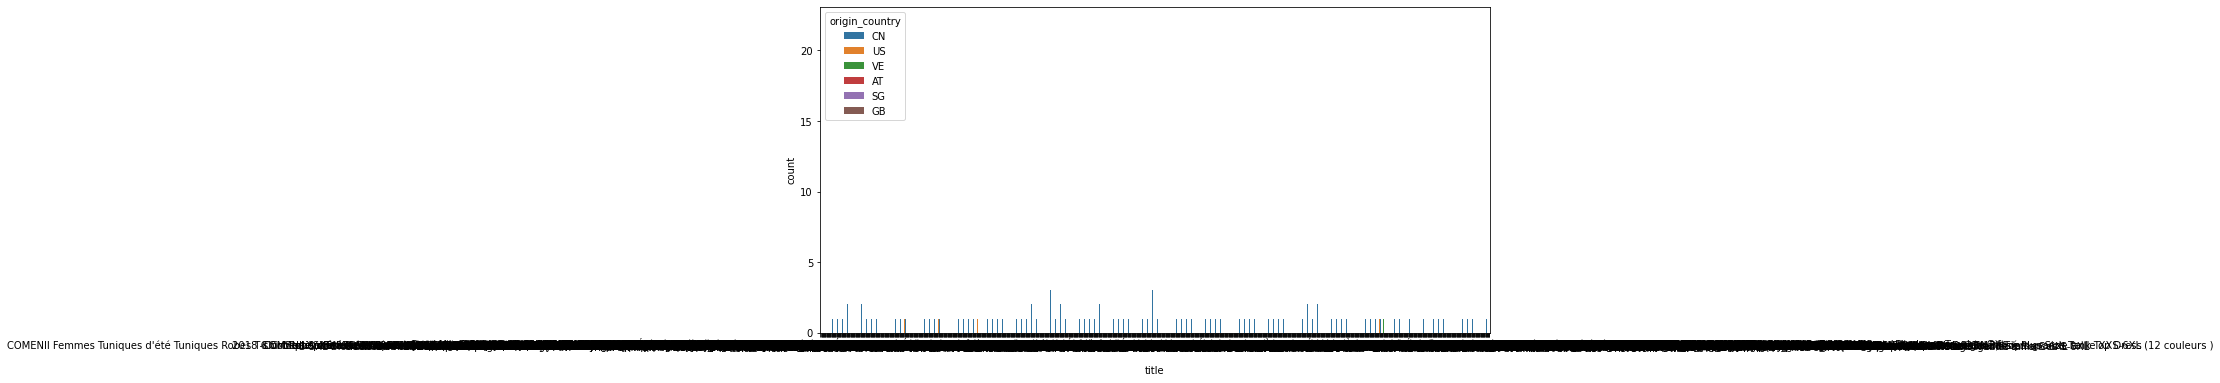

c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


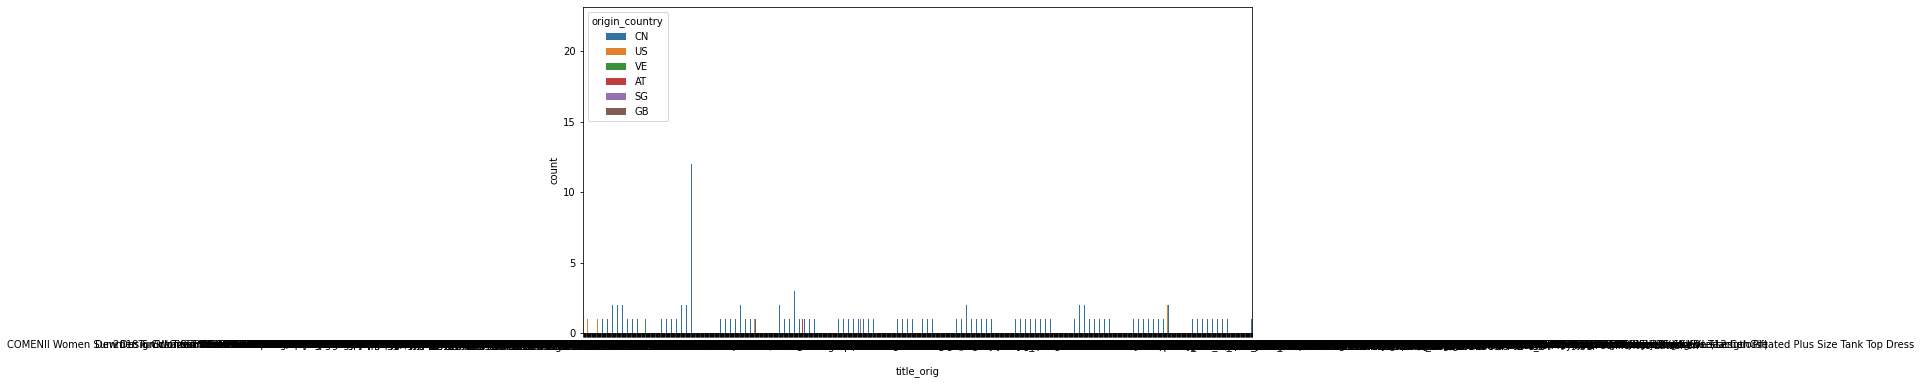

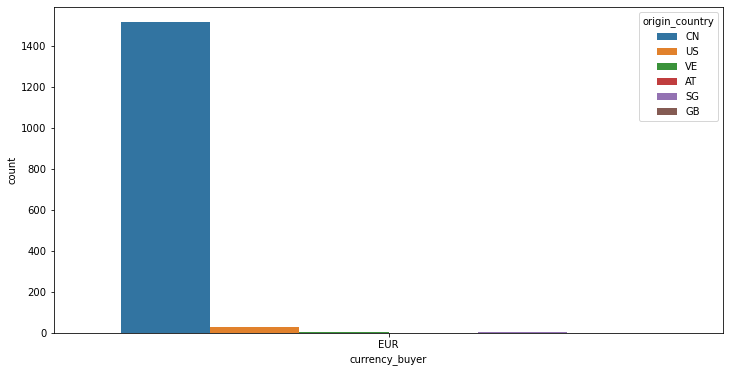

c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28417 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24125 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 28417 missing from c

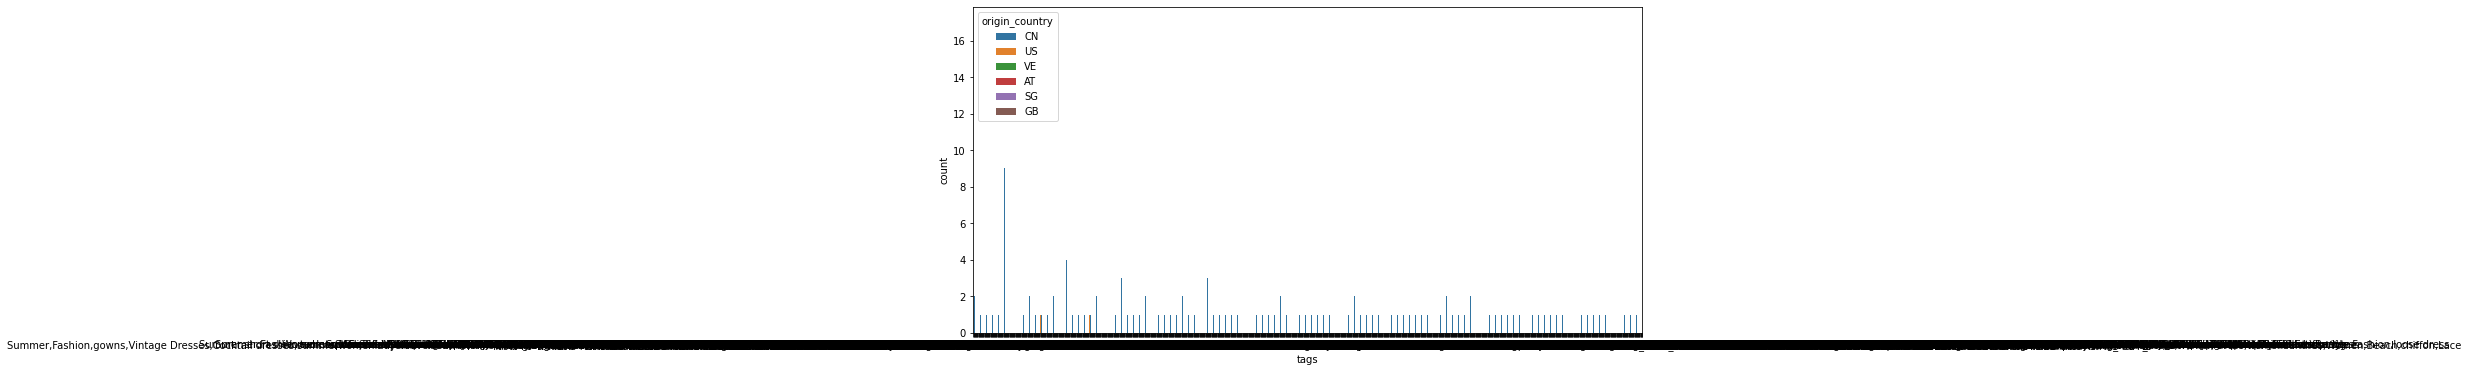

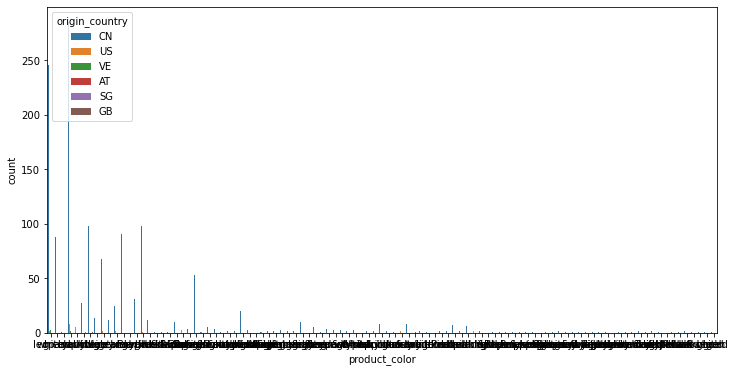

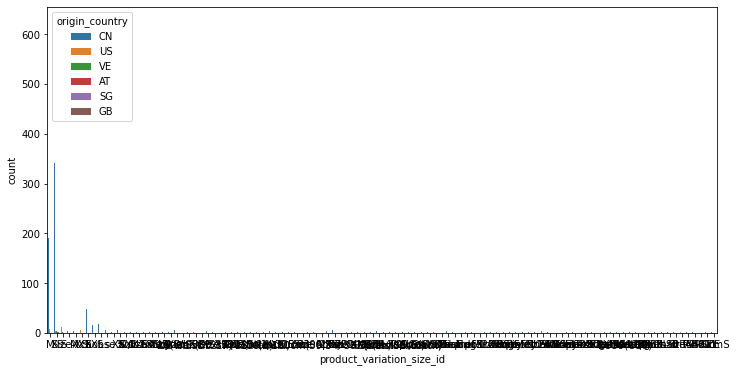

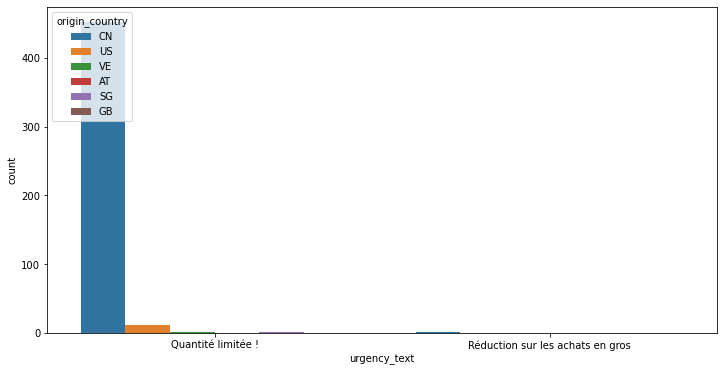

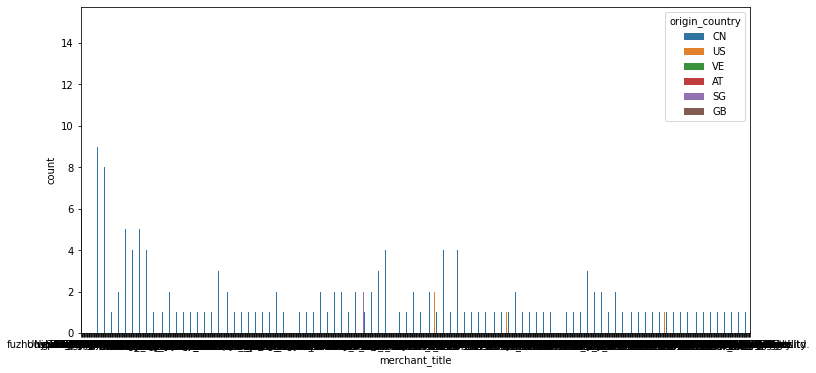

c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24191 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20052 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 33678 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39280 missing from c

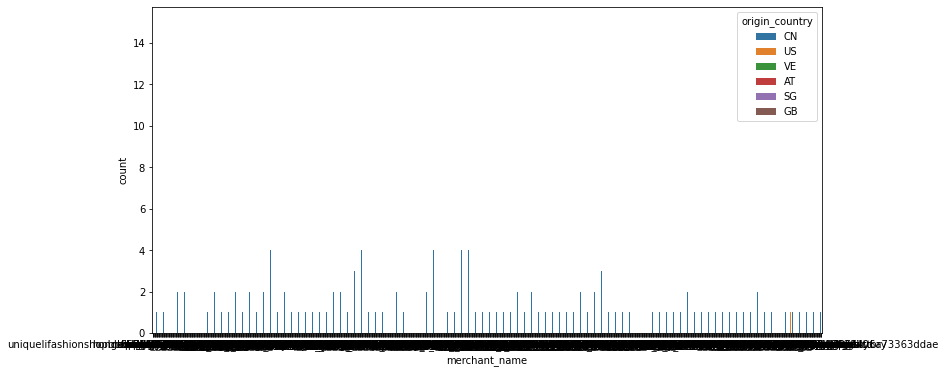

c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jamm_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3617 missing from current

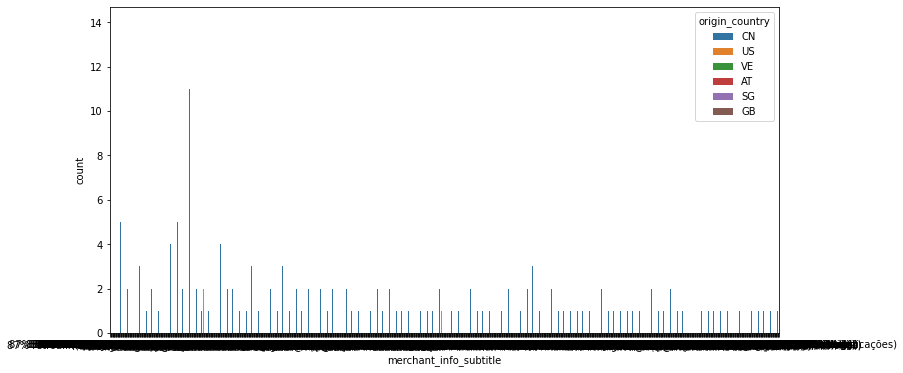

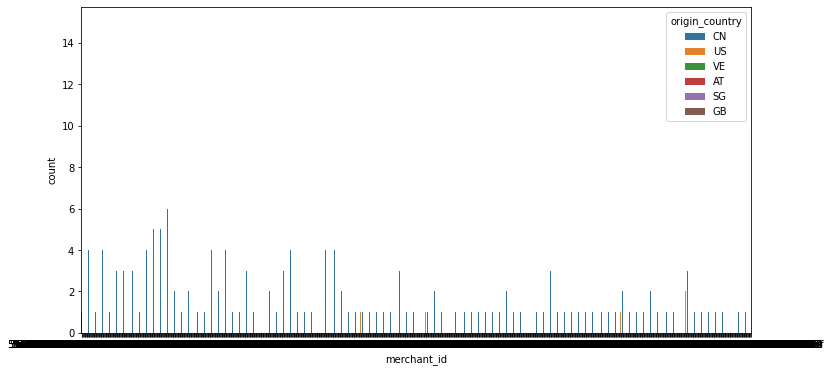

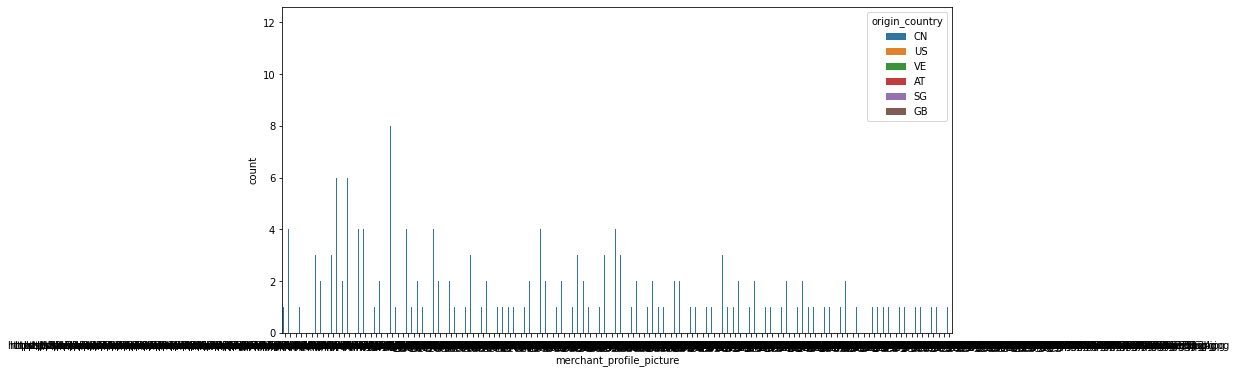

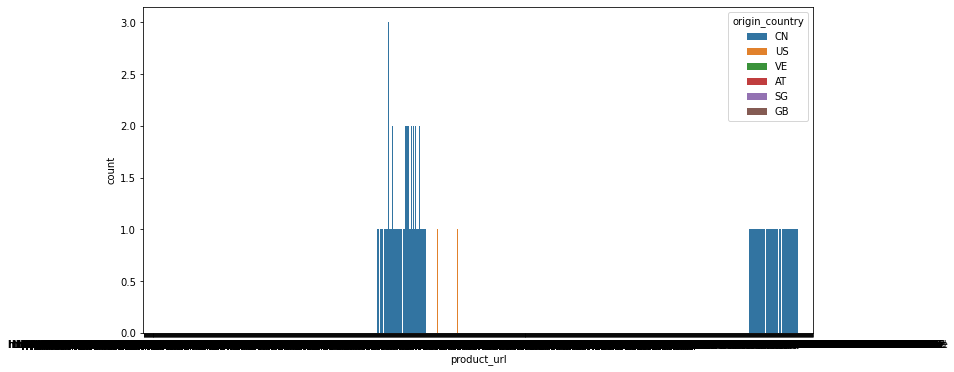

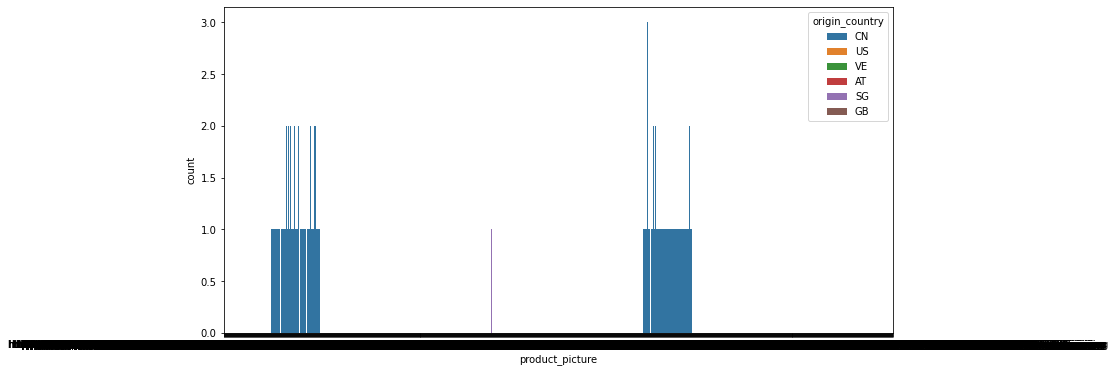

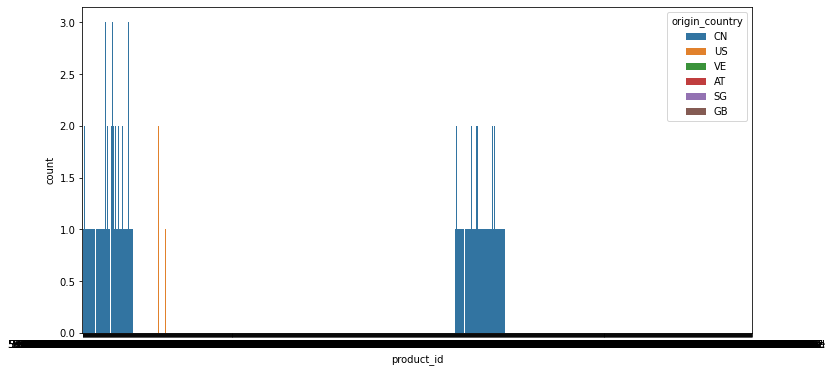

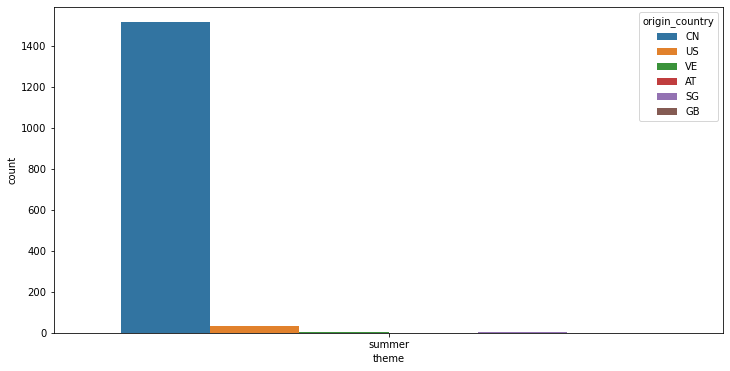

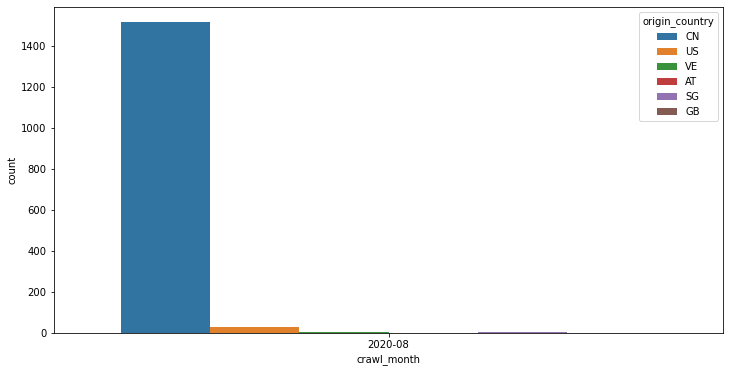

In [16]:
plotcategoricavals(df, categoric_Var ,'origin_country')

### Analisis de variables Continuas

In [12]:
def plot_Var(df, dfcontinuos_var ,y):
    for column in dfcontinuos_var:
        plt.figure(figsize=(12,6))
        plot = sns.countplot(x=df[column], hue=df['origin_country'])
        plt.show()

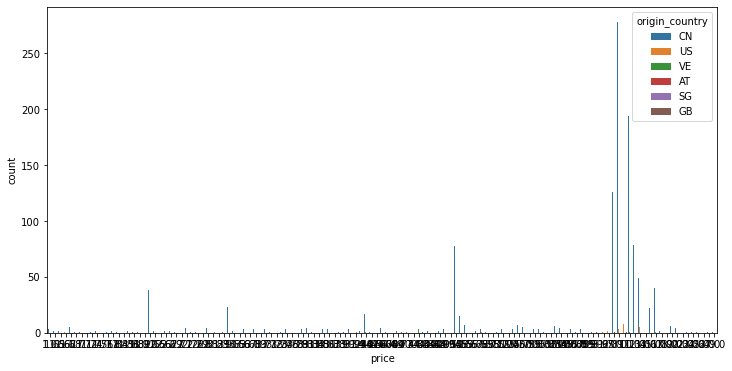

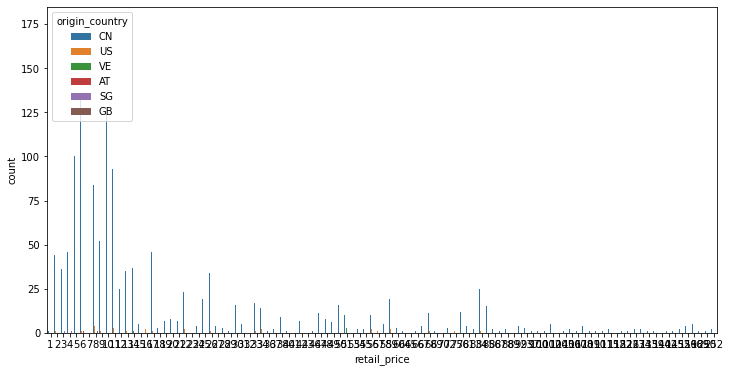

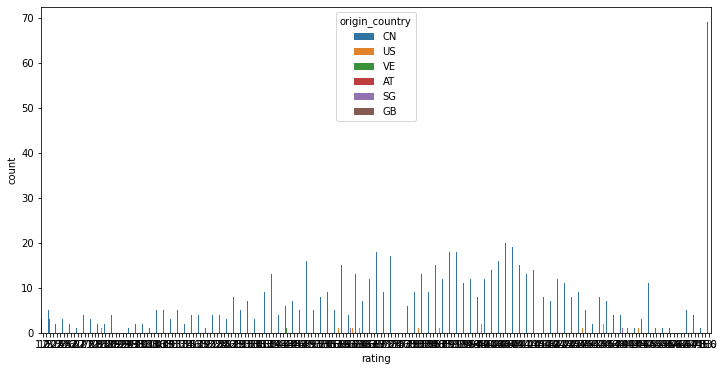

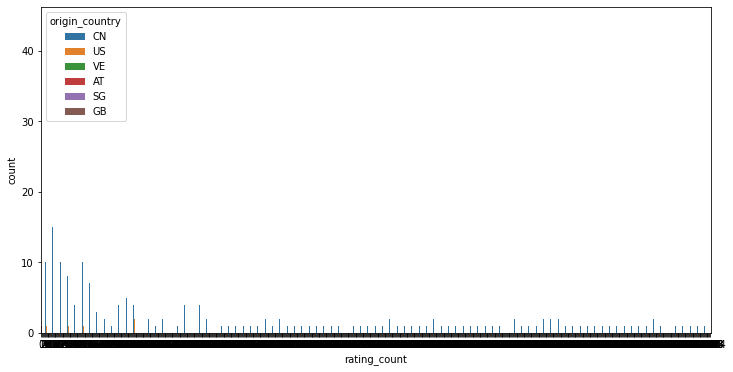

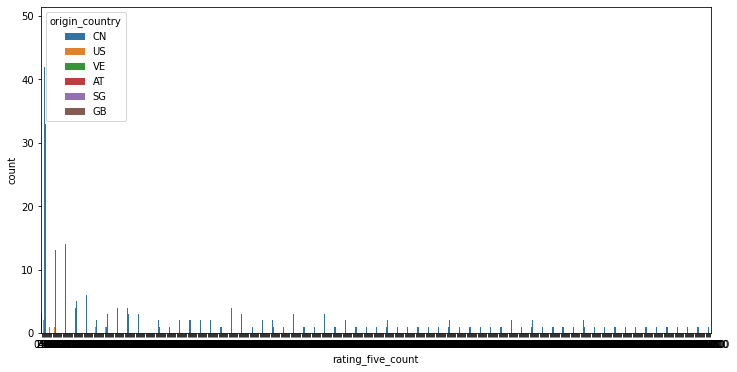

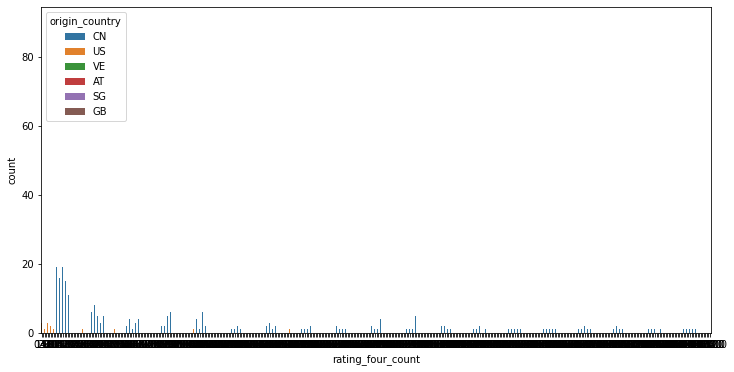

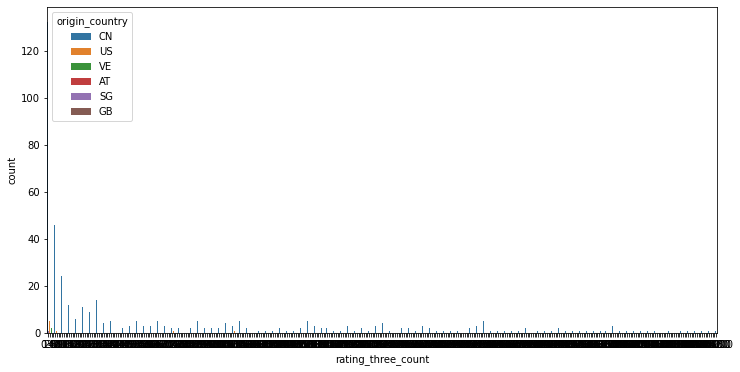

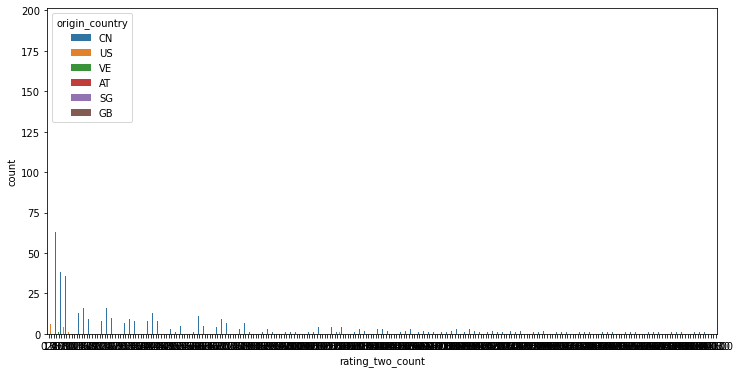

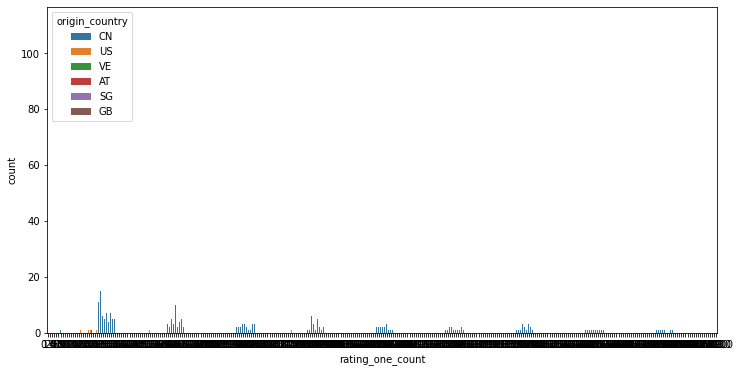

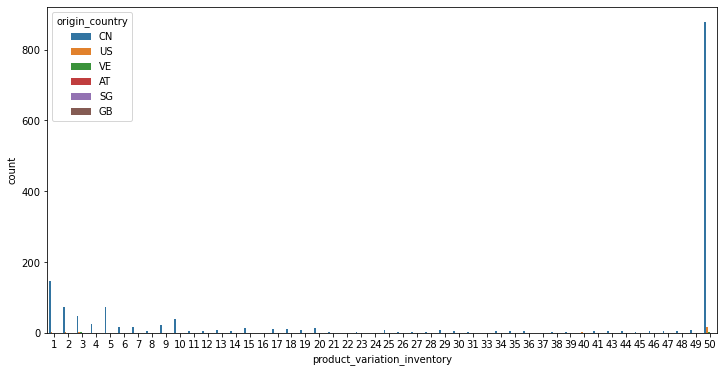

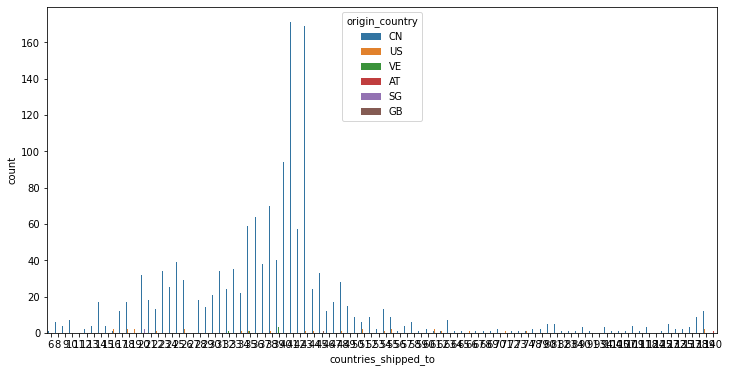

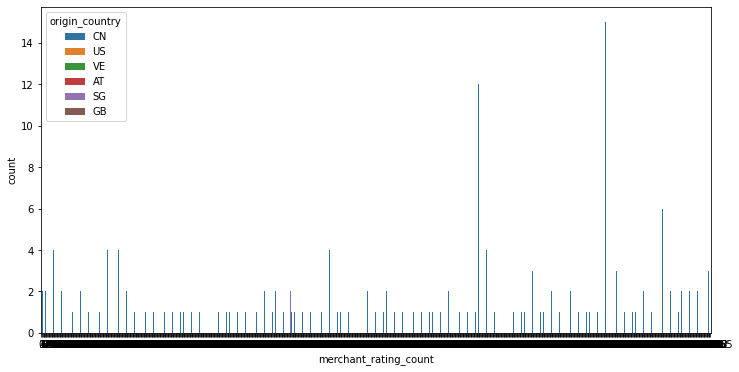

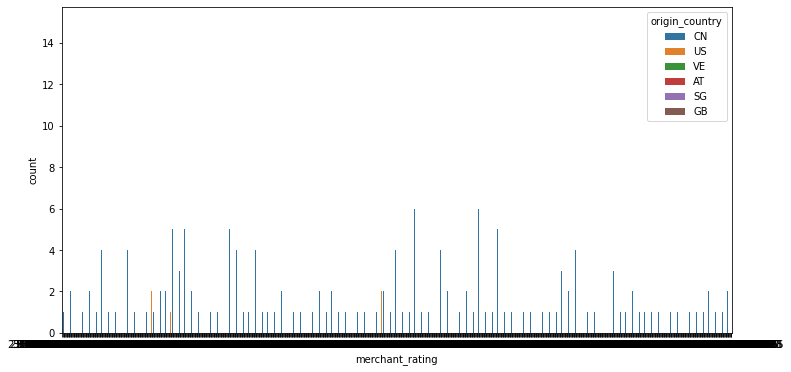

In [13]:
plot_Var(df, dfcontinuos_var ,'origin_country')

In [ ]:
### Analisis de variables discretas

In [14]:
def plot_Vard(df, dfdiscret_var ,y):
    for column in dfdiscret_var:
        plt.figure(figsize=(12,6))
        plot = sns.countplot(x=df[column], hue=df['origin_country'])
        plt.show()

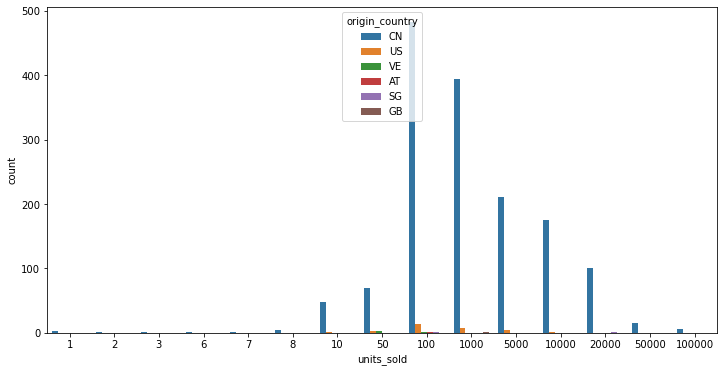

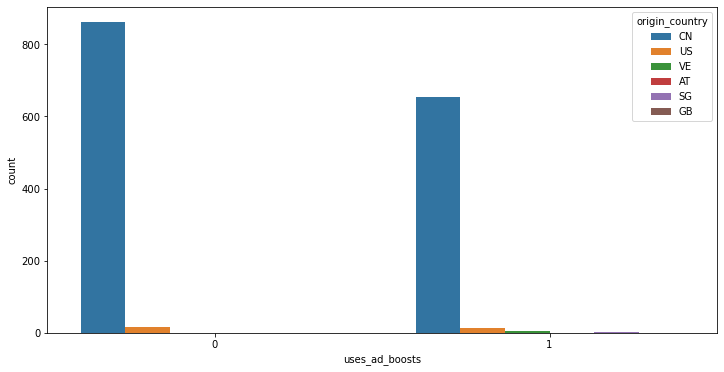

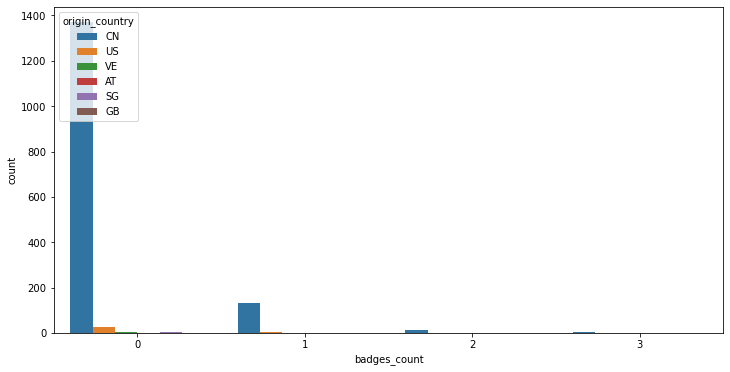

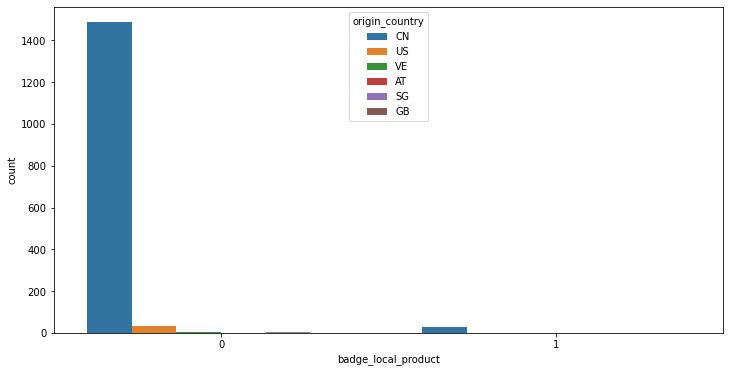

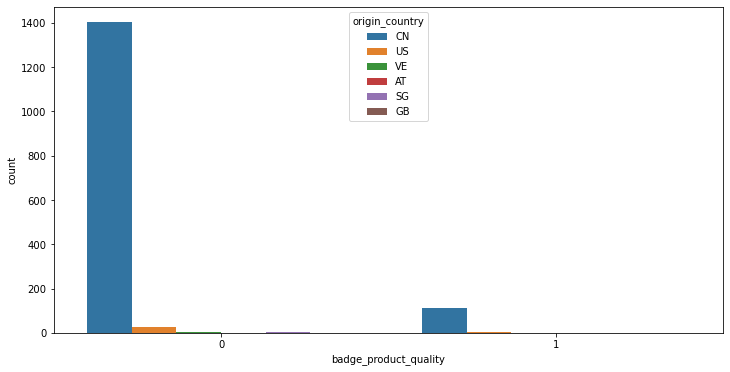

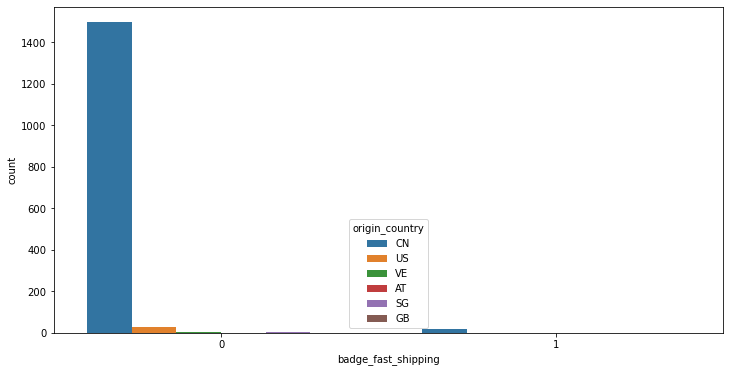

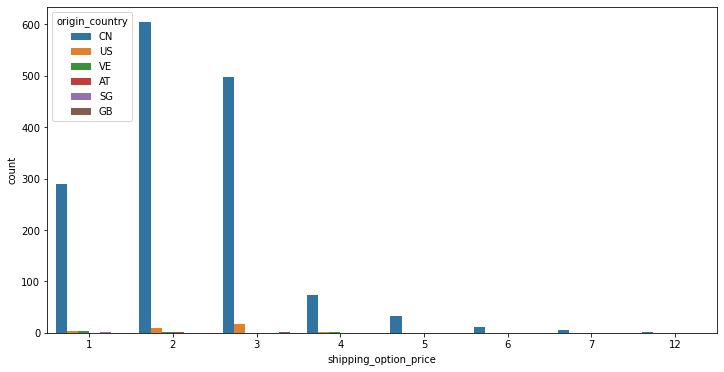

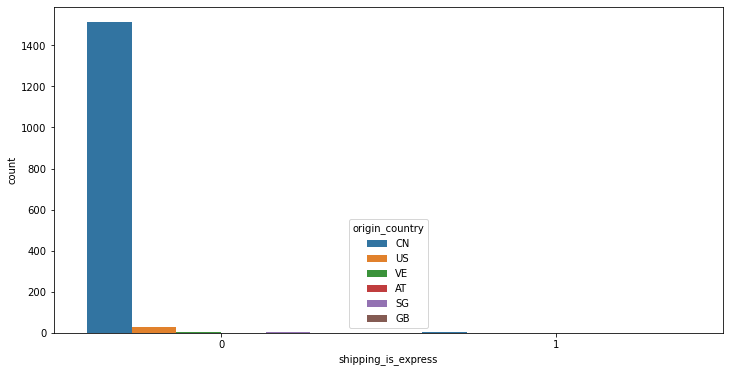

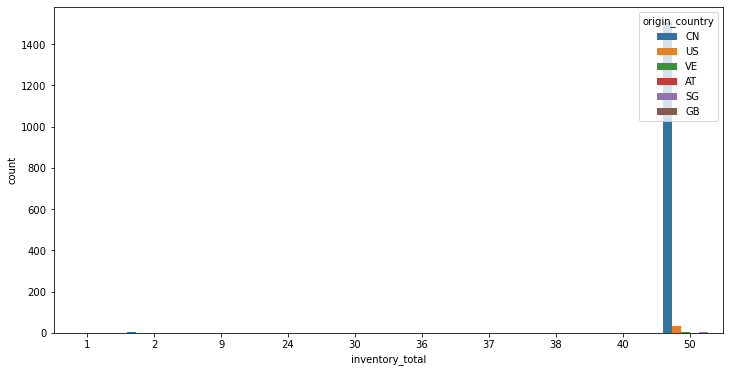

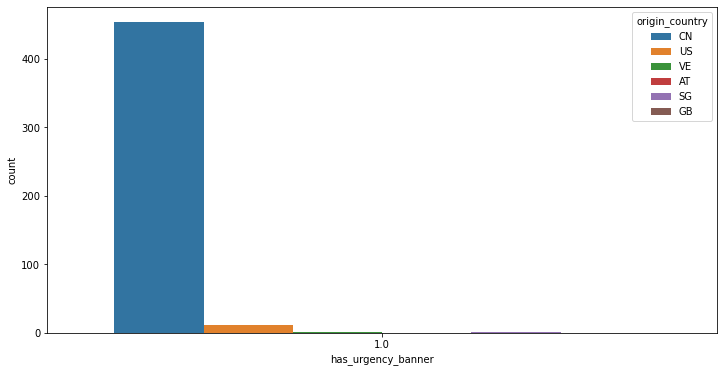

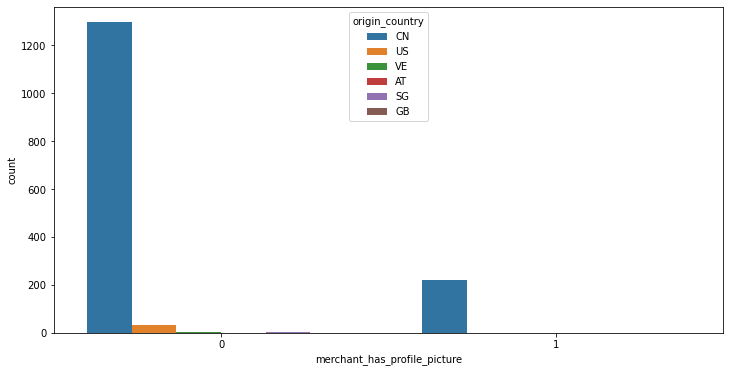

In [15]:
plot_Vard(df, dfdiscret_var ,'origin_country')